In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Define the function to optimize
def fitness_function(x, y):
    z = 3 * (1 - x) ** 2 * (math.exp(-x ** 2 - (y + 1) ** 2)) - 10 * (x / 5 - x ** 3 - y ** 5) * (math.exp(-x ** 2 - y ** 2)) - 1 / 3 * (math.exp(-(x + 1) ** 2 - y ** 2))
    return z+60 # we sum 60 in order to make all the funcion in z axis positive

In [3]:
# Initialize the population
def inital_population(population_size):
    population = []
    for i in range(population_size):
        x = random.uniform(-3, 3)
        y = random.uniform(-3, 3)
        population.append((x, y))
    
    # Evaluate the points in the fitness_function
    fitness_scores = [fitness_function(x, y) for x, y in population]
    return fitness_scores,population

def best_init_solution(fitness_scores,population): #finds the best population
    best_fitness = max(fitness_scores)
    best_solution = population[fitness_scores.index(best_fitness)]
    print("Generación:", 0, "| Mejor solución:", best_solution, "| Fitness:", best_fitness)
    return best_fitness,best_solution

def Ruletta(fitness_scores,population_size): #select the parents with the ruletta method
    fitness_sum = sum(fitness_scores)
    parent_indices = []
    for j in range(population_size):
        pick = random.uniform(0, fitness_sum)
        current_sum = 0
        for index, score in enumerate(fitness_scores):
            current_sum += score
            if current_sum > pick:
                parent_indices.append(index)
                break
    return parent_indices

def crossover(population_size,parent_indices,population,crossover_rate):
    # Generar descendencia mediante cruce de un punto
    offspring = []
    for j in range(population_size // 2):
        parent1_index = parent_indices[2*j]
        parent2_index = parent_indices[2*j + 1]
        parent1 = population[parent1_index]
        parent2 = population[parent2_index]
        if random.uniform(0, 1) < crossover_rate:
            crossover_point = random.randint(0, 1)
            offspring1 = (parent1[crossover_point], parent2[1-crossover_point])
            offspring2 = (parent2[crossover_point], parent1[1-crossover_point])
        else:
            offspring1 = parent1
            offspring2 = parent2
        offspring.append(offspring1)
        offspring.append(offspring2)
    return offspring

def mutation(mutation_rate,population_size,population,fitness_scores,offspring):
        # Mutar la descendencia con una mutación simple
    mutated_offspring = []
    for offspring in offspring:
        if random.uniform(0, 1) < mutation_rate:
            mutated_x = offspring[0] + random.uniform(-1, 1)
            mutated_y = offspring[1] + random.uniform(-1, 1)
            mutated_offspring.append((mutated_x, mutated_y))
        else:
            mutated_offspring.append(offspring)
    
    # Evaluar la descendencia mutada
    mutated_fitness_scores = [fitness_function(x, y) for x, y in mutated_offspring]
    
    # Reemplazar la población anterior con la descendencia mutada
    for j in range(population_size):
        if mutated_fitness_scores[j] > fitness_scores[j]:
            population[j] = mutated_offspring[j]
            fitness_scores[j] = mutated_fitness_scores[j]

def main(population_size, num_generations, crossover_rate, mutation_rate):
    # Evaluar la población inicial
    fitness_scores,population=inital_population(population_size)
    
    # Encontrar la mejor solución de la población inicial
    best_fitness,best_solution=best_init_solution(fitness_scores,population)
    final_max_values=[best_fitness]
    final_min_values=[min(fitness_scores)]
    final_mean_values=[np.mean(fitness_scores)]
    generacion=[0]
    for i in range(num_generations):
        parent_indices=Ruletta(fitness_scores,population_size)
        offspring=crossover(population_size,parent_indices,population,crossover_rate)
        mutation(mutation_rate,population_size,population,fitness_scores,offspring)
        # Encontrar la mejor solución de la generación actual
        best_generation_fitness,worst_generation_fitness,mean_generation_fitness = max(fitness_scores),min(fitness_scores),np.mean(fitness_scores)
        best_generation_solution = population[fitness_scores.index(best_generation_fitness)]
        # Actualizar la mejor solución encontrada hasta el momento
        if best_generation_fitness > best_fitness:
            best_fitness = best_generation_fitness
            best_solution = best_generation_solution
        final_max_values.append(best_generation_fitness)
        final_min_values.append(worst_generation_fitness)
        final_mean_values.append(mean_generation_fitness)
        # Imprimir información de la generación actual
        print("Generación:", i+1, "| Mejor solución:", best_generation_solution, "| Fitness:", best_generation_fitness)
        generacion.append(i+1)
    return generacion, final_max_values,final_min_values,final_mean_values



In [4]:
x,max_values,min_values,mean_values=main(20, 100, 0.9, 0.04)

Generación: 0 | Mejor solución: (1.417814266467209, 0.01849182173306474) | Fitness: 63.46089704725397
Generación: 1 | Mejor solución: (1.417814266467209, 0.01849182173306474) | Fitness: 63.46089704725397
Generación: 2 | Mejor solución: (-0.1409132401249451, 1.6196723228228587) | Fitness: 67.93936032635486
Generación: 3 | Mejor solución: (-0.1409132401249451, 1.6196723228228587) | Fitness: 67.93936032635486
Generación: 4 | Mejor solución: (-0.1409132401249451, 1.6196723228228587) | Fitness: 67.93936032635486
Generación: 5 | Mejor solución: (-0.07914100475324037, 1.6196723228228587) | Fitness: 68.04170501728484
Generación: 6 | Mejor solución: (-0.07914100475324037, 1.6196723228228587) | Fitness: 68.04170501728484
Generación: 7 | Mejor solución: (-0.07914100475324037, 1.6196723228228587) | Fitness: 68.04170501728484
Generación: 8 | Mejor solución: (-0.07914100475324037, 1.6196723228228587) | Fitness: 68.04170501728484
Generación: 9 | Mejor solución: (-0.07914100475324037, 1.61967232282285

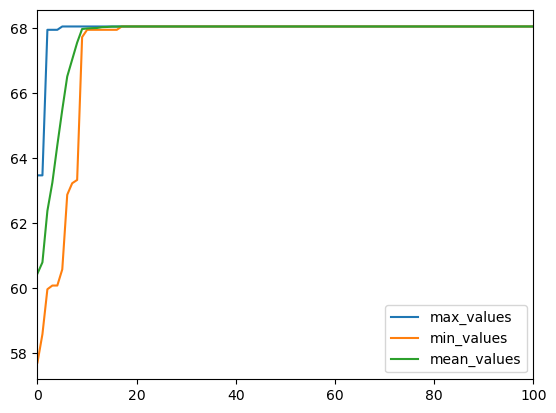

In [5]:
plt.plot(x,max_values,label="max_values")
plt.plot(x,min_values,label="min_values")
plt.plot(x,mean_values,label="mean_values")
plt.legend()
#plt.ylim(0,68.05)
plt.xlim(0,100)
plt.show()

Generación: 0 | Mejor solución: (-0.44569715051235903, 1.201636469747795) | Fitness: 64.83100878147282
Generación: 1 | Mejor solución: (-0.44569715051235903, 1.201636469747795) | Fitness: 64.83100878147282
Generación: 2 | Mejor solución: (-0.44569715051235903, 1.201636469747795) | Fitness: 64.83100878147282
Generación: 3 | Mejor solución: (-0.44569715051235903, 1.201636469747795) | Fitness: 64.83100878147282
Generación: 4 | Mejor solución: (0.537398442303425, 1.402734265889288) | Fitness: 65.73441747792383
Generación: 5 | Mejor solución: (-0.06656721932336351, 1.402734265889288) | Fitness: 67.56719404782284
Generación: 6 | Mejor solución: (-0.06656721932336351, 1.402734265889288) | Fitness: 67.56719404782284
Generación: 7 | Mejor solución: (-0.06656721932336351, 1.5291878766683498) | Fitness: 68.03662174884427
Generación: 8 | Mejor solución: (-0.06656721932336351, 1.5291878766683498) | Fitness: 68.03662174884427
Generación: 9 | Mejor solución: (-0.06656721932336351, 1.5291878766683498)

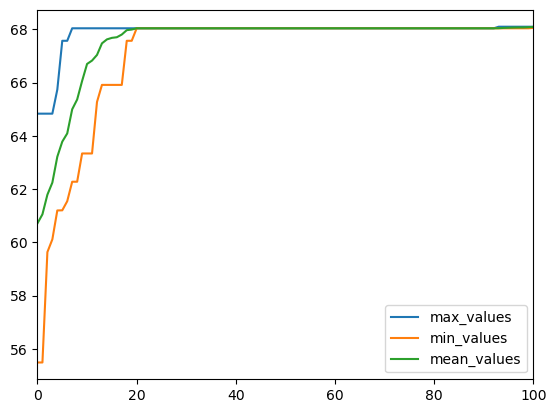

In [6]:
x,max_values,min_values,mean_values=main(20, 20000, 1, 0.01)
plt.plot(x,max_values,label="max_values")
plt.plot(x,min_values,label="min_values")
plt.plot(x,mean_values,label="mean_values")
plt.legend()
#plt.ylim(0,68.05)
plt.xlim(0,100)
plt.show()